In [44]:
# Setup
!pip install --quiet --upgrade pip

# Install the dependencies.
!pip install --quiet -r requirements.txt

# Restart the runtime by ending the process.
exit()

In [43]:
import numpy as np
import pandas as pd
from serving.data import get_varied_labels, get_labels
from importlib import reload
import matplotlib.pyplot as plt


In [37]:
df = get_labels()
df["year"] = pd.to_numeric(df["year"])
df["square_target"] = np.power(df["target"], 3 )

In [38]:
df.head()

,commodity_desc,reference_period_desc,year,state_ansi,state_name,county_ansi,county_name,target,source_file,square_target
0,CORN,YEAR,2016,01,ALABAMA,003,BALDWIN,152.9,USDA_Corn_County_2016.csv,3574558.889
1,CORN,YEAR,2016,01,ALABAMA,005,BARBOUR,188.9,USDA_Corn_County_2016.csv,6740558.369
2,CORN,YEAR,2016,01,ALABAMA,019,CHEROKEE,92.3,USDA_Corn_County_2016.csv,786330.467
3,CORN,YEAR,2016,01,ALABAMA,029,CLEBURNE,125.0,USDA_Corn_County_2016.csv,1953125.000
4,CORN,YEAR,2016,01,ALABAMA,031,COFFEE,104.5,USDA_Corn_County_2016.csv,1141166.125


In [39]:
actual_images = pd.DataFrame(np.load(r"C:\Users\tskor\Documents\GitHub\inovation_project\2_gc-pipeline\all_images.npy"),
                            columns=["county_name", 'state_ansi', 'year'])
actual_images["year"] = pd.to_numeric(actual_images["year"])
actual_images["county_name"] = actual_images["county_name"].str.upper()
actual_images.head()

,county_name,state_ansi,year
0,SUTTER,06,2016
1,SUTTER,06,2018
2,SUTTER,06,2019
3,SUTTER,06,2021
4,SUTTER,06,2022


In [40]:
df_actual = df.merge(actual_images, how="inner", on=["county_name", 'state_ansi', 'year'])
df_actual.head()
df_actual.describe()


,year,target,square_target
count,9590.000000,9590.000000,9.590000e+03
mean,2019.030031,156.996747,4.502748e+06
std,2.024960,37.549945,2.674301e+06
min,2016.000000,19.800000,7.762392e+03
25%,2017.000000,133.500000,2.379270e+06
50%,2019.000000,162.000000,4.251528e+06
75%,2021.000000,184.200000,6.249840e+06
max,2022.000000,270.200000,1.972677e+07


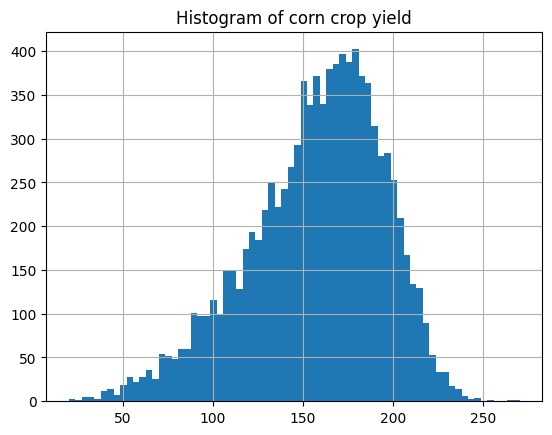

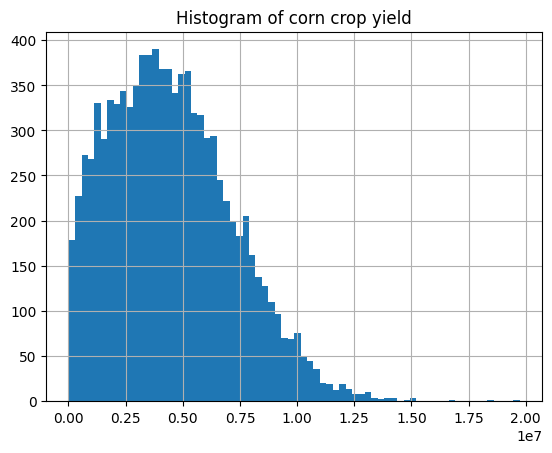

Skewness traget: -0.5843767135446957
Skewness square_target: 0.5515991520833877


In [45]:
columns = ["target", "square_target"]

for col in columns:
    df_actual.hist(col, bins=70)
    plt.title("Histogram of corn crop yield")
    plt.show()

print("Skewness traget: {}".format(df_actual["target"].skew()))
print("Skewness square_target: {}".format(df_actual["square_target"].skew()))


In [98]:
mean_per_county = labels_df.groupby("county_name")["target"].mean()
mean_per_state = labels_df.groupby("state_name")["target"].mean()

print(mean_per_county.head())
print(mean_per_state.head())

print(labels_df.describe())

county_name
ACCOMACK    155.071429
ADA         220.920000
ADAIR       170.050000
ADAMS       149.251724
AIKEN       136.575000
Name: target, dtype: float64
state_name
ALABAMA       139.969737
ARKANSAS      177.167232
CALIFORNIA    177.717241
COLORADO      126.891818
DELAWARE      167.557143
Name: target, dtype: float64
             target
count  10246.000000
mean     157.151464
std       37.482781
min       19.800000
25%      133.900000
50%      162.150000
75%      184.400000
max      270.200000


In [3]:
df_varied = get_varied_labels(0, 2000)

In [17]:

pd.set_option('display.max_colwidth', 20)

In [34]:
df_varied[df_varied["county_name"]=="SUTTER"]

,year,state_ansi,county_ansi,county_name
0,2016,06,101,SUTTER
1,2018,06,101,SUTTER
2,2019,06,101,SUTTER
3,2021,06,101,SUTTER
4,2022,06,101,SUTTER
